# Exploration der Word2vec Embeddings 40

- balanciertes Korpus
- ohne Bigramme
- vector_size: 300
- window: 15
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v11.model'))
w2v12 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v12.model'))
w2v13 = Word2Vec.load(os.path.join('../trained_models/Word2Vec40', '40w2v13.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1975', '1976-2000', '2001-2010', '2011-2016', '2017-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11, w2v12, w2v13] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [94]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
        #elif word1 not in m.wv:
            #cosines.update({p : np.nan})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')

In [9]:
presto0

{'1700-1750': 0.26265791058540344,
 '1751-1800': 0.29061731696128845,
 '1801-1825': 0.3074217140674591,
 '1826-1850': 0.34749171137809753,
 '1851-1875': 0.360370397567749,
 '1876-1900': 0.2936616539955139,
 '1901-1925': 0.2996939420700073,
 '1926-1950': 0.21932432055473328,
 '1951-1975': 0.293658584356308,
 '1976-2000': 0.2990625202655792,
 '2001-2010': 0.25039705634117126,
 '2011-2016': 0.2913011908531189,
 '2017-2021': 0.3054233193397522}

In [10]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

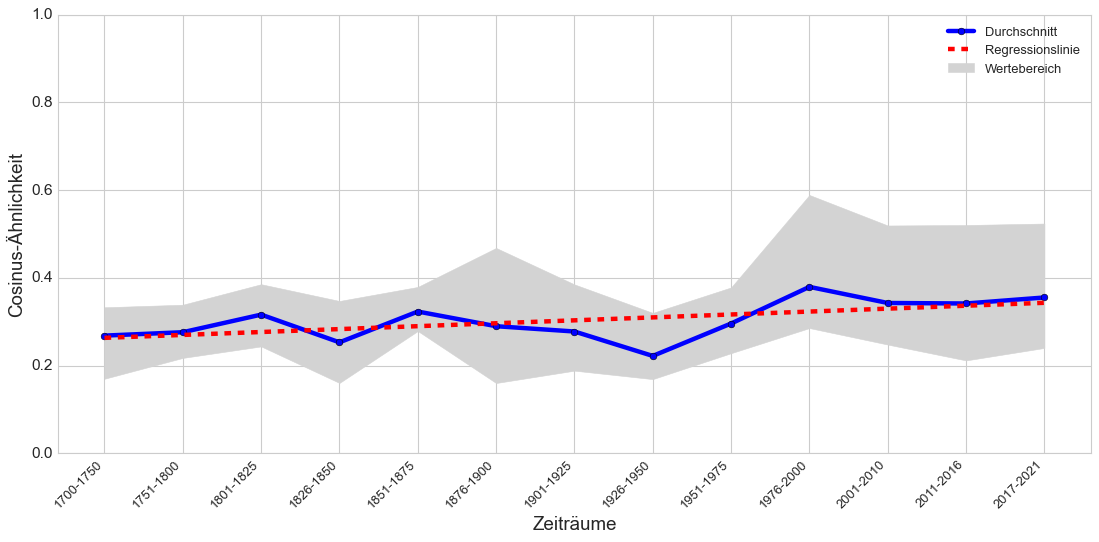

In [15]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [16]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [17]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [18]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [19]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [20]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [21]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [22]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [23]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, spesso_mean])
control_mean = dict(control_mean_df.mean())

In [24]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, spesso_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [25]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, spesso_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

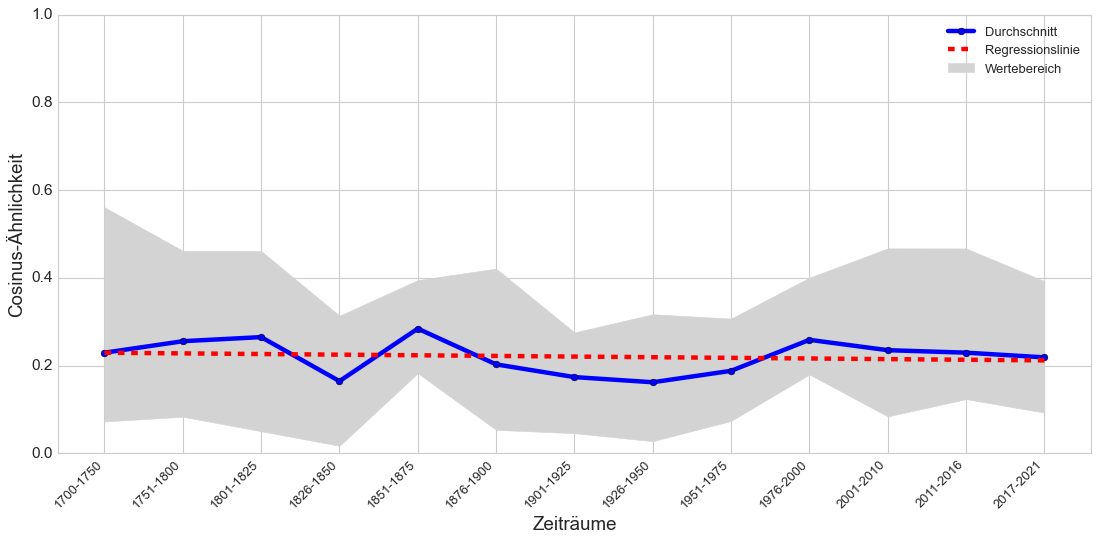

In [26]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [27]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(accenn, 0.884421169757843)","(irriverenza, 0.9426485896110535)","(palafreniere, 0.9042471647262573)","(delazione, 0.8209949135780334)","(straziare, 0.8263403177261353)","(scatenato, 0.6500638127326965)","(straziato, 0.6972777843475342)","(dissimulazione, 0.7200536727905273)","(martirii, 0.7475641369819641)","(perire, 0.7321527004241943)","(mutilare, 0.7276452779769897)","(torturare, 0.758567750453949)","(opprimere, 0.7766085267066956)"
1,"(aborrisci, 0.8824272155761719)","(allontaner, 0.9420029520988464)","(riputerebbero, 0.9016176462173462)","(sagrificano, 0.8203909993171692)","(crudelmente, 0.8154237866401672)","(vituperare, 0.6399333477020264)","(provandolo, 0.6611801981925964)","(conscienza, 0.6945749521255493)","(fantasticare, 0.7400997877120972)","(offesa, 0.7289002537727356)","(torturare, 0.7218255996704102)","(trockmorton, 0.7362604141235352)","(elfo, 0.7579007744789124)"
2,"(muletto, 0.8820627331733704)","(filsico, 0.9418685436248779)","(sviamento, 0.9007397294044495)","(inventano, 0.8099308609962463)","(impunito, 0.8005506992340088)","(ferocia, 0.6342068314552307)","(sofferse, 0.6489840149879456)","(alzai, 0.6868162751197815)","(sconfinato, 0.7265178561210632)","(vigliaccheria, 0.719641923904419)","(dilaniare, 0.7193480730056763)","(inerme, 0.7308583855628967)","(afflizione, 0.7551295757293701)"
3,"(lavro, 0.8816691637039185)","(inferocisce, 0.9399085640907288)","(sacrificati, 0.9007067084312439)","(despota, 0.8027809858322144)","(tradito, 0.79511958360672)","(inflessibile, 0.6312952637672424)","(prigionia, 0.6416137218475342)","(indifeso, 0.6805235147476196)","(struggere, 0.7069915533065796)","(turpe, 0.7170991897583008)","(atroce, 0.7170314788818359)","(delazione, 0.7271802425384521)","(ripugnante, 0.7530653476715088)"
4,"(smagato, 0.8811134099960327)","(incorporeo, 0.9385828375816345)","(ciònonostante, 0.9001727104187012)","(esacerbare, 0.7886812686920166)","(inasprire, 0.7935864329338074)","(onta, 0.6241776943206787)","(implacabile, 0.6311850547790527)","(attanagliare, 0.6790524125099182)","(macerare, 0.7062846422195435)","(percossa, 0.7145058512687683)","(straziante, 0.7045544981956482)","(castelnau, 0.7142060995101929)","(aguzzo, 0.7467377781867981)"
5,"(riprenditi, 0.8808877468109131)","(punirsi, 0.9383489489555359)","(invendicato, 0.8993582725524902)","(conculcare, 0.7828693985939026)","(roso, 0.782170295715332)","(radetzky, 0.6043167114257812)","(vendicandosi, 0.6276460886001587)","(inarticolato, 0.6784611940383911)","(lussuria, 0.7038777470588684)","(sottomettere, 0.7089558243751526)","(barbaramente, 0.702679455280304)","(ingrato, 0.7120091319084167)","(viscere, 0.740439772605896)"
6,"(idolatrar, 0.8808820843696594)","(berrette, 0.9375277757644653)","(pizarro, 0.8991051316261292)","(sanguinario, 0.7773369550704956)","(aborrì, 0.7803089618682861)","(complice, 0.6035340428352356)","(agonizzare, 0.6196506023406982)","(invadeva, 0.6686016321182251)","(ardiva, 0.7018831968307495)","(kipling, 0.7088567018508911)","(straziato, 0.7015902996063232)","(oltraggiare, 0.7097816467285156)","(tirannico, 0.740071177482605)"
7,"(fedeltade, 0.8805202841758728)","(risguardarsi, 0.9370406270027161)","(screpolarglisi, 0.8987776041030884)","(calunniare, 0.7746405601501465)","(avvelenare, 0.7792364358901978)","(ripulse, 0.6010192632675171)","(vendicare, 0.6173004508018494)","(inumano, 0.6660720109939575)","(sfilacciamento, 0.6947903037071228)","(efferatezza, 0.7084732055664062)","(scimitarra, 0.701560378074646)","(pietà, 0.7051070928573608)","(atterrita, 0.7386640310287476)"
8,"(cederei, 0.8804609775543213)","(providissimo, 0.9369877576828003)","(inulte, 0.8972200751304626)","(libidine, 0.7742018103599548)","(avvilire, 0.7786547541618347)","(attentato, 0.6002517938613892)","(etutto, 0.6172439455986023)","(lagno, 0.6626542806625366)","(arridergli, 0.69361811876297)","(troia, 0.7081050276756287)","(

In [28]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.41581690311431885,
 '1751-1800': 0.5026640295982361,
 '1801-1825': 0.49045512080192566,
 '1826-1850': 0.3655567169189453,
 '1851-1875': 0.47582000494003296,
 '1876-1900': 0.3342127799987793,
 '1901-1925': 0.30035698413848877,
 '1926-1950': 0.23777242004871368,
 '1951-1975': 0.2734779417514801,
 '1976-2000': 0.3939879536628723,
 '2001-2010': 0.3564135432243347,
 '2011-2016': 0.2787730395793915,
 '2017-2021': 0.3563039302825928}

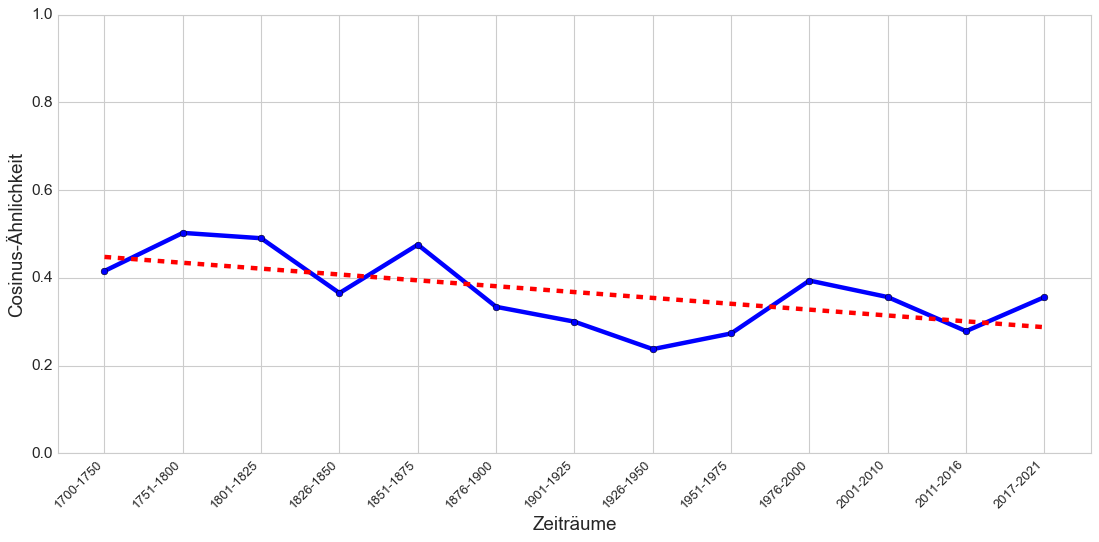

In [29]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

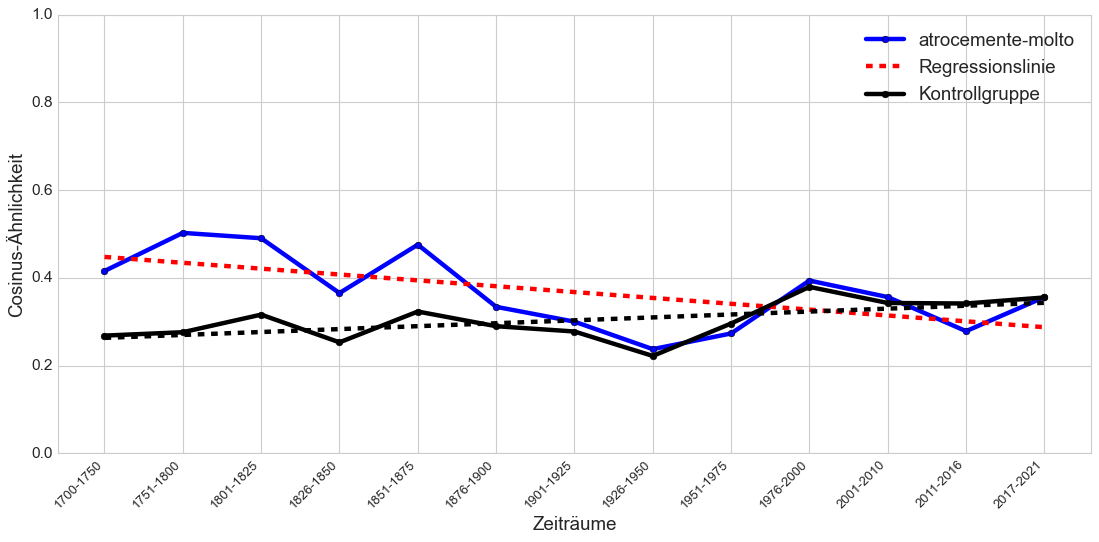

In [30]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [31]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [32]:
atrocemente1

{'1700-1750': 0.6266242861747742,
 '1751-1800': 0.5160597562789917,
 '1801-1825': 0.4678803086280823,
 '1826-1850': 0.29552143812179565,
 '1851-1875': 0.473823219537735,
 '1876-1900': 0.31262823939323425,
 '1901-1925': 0.2901358902454376,
 '1926-1950': 0.3069988489151001,
 '1951-1975': 0.42961356043815613,
 '1976-2000': 0.36481788754463196,
 '2001-2010': 0.5151150822639465,
 '2011-2016': 0.46420446038246155,
 '2017-2021': 0.554892361164093}

In [33]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

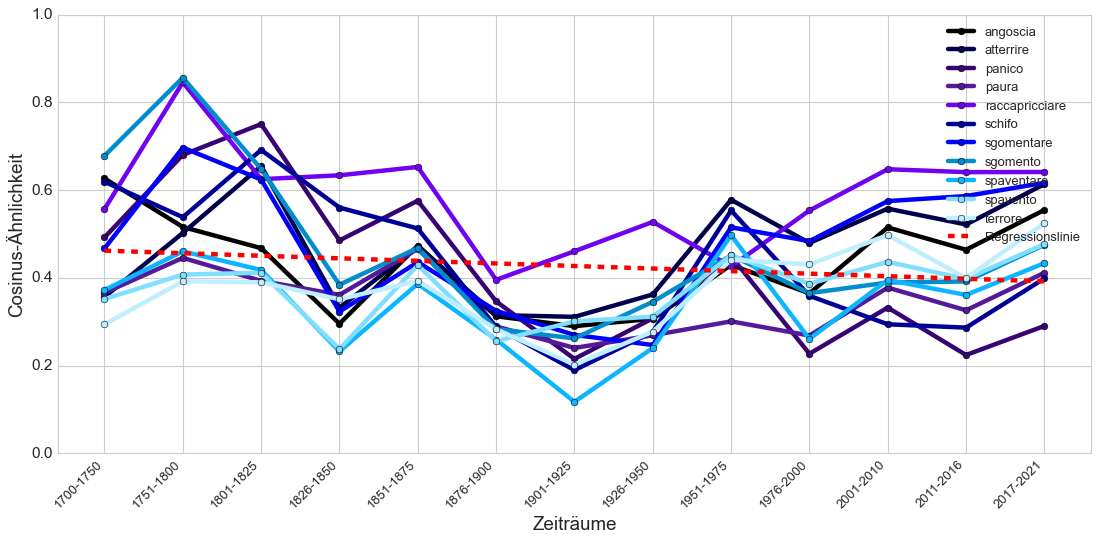

In [34]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

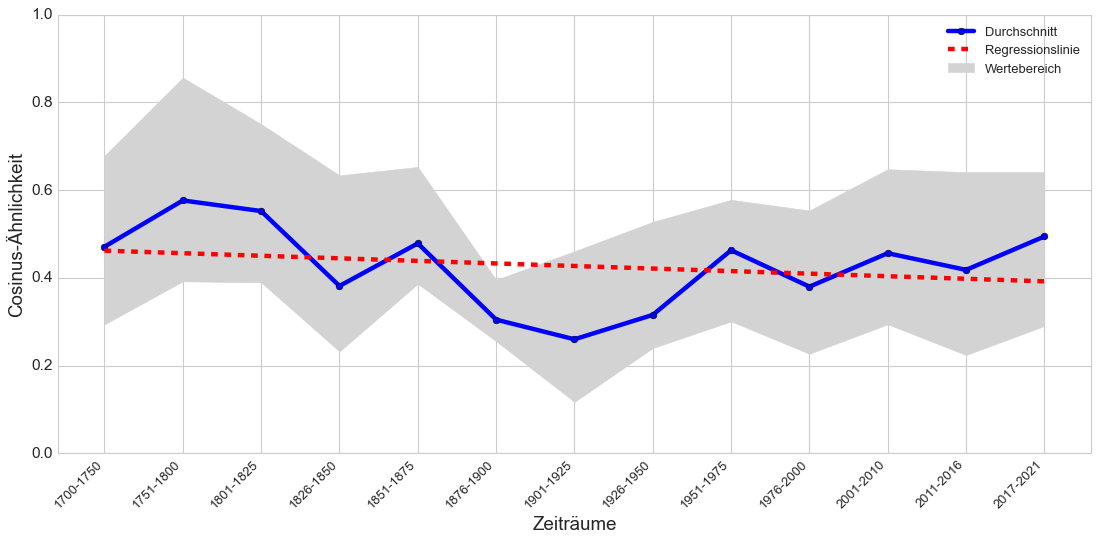

In [35]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

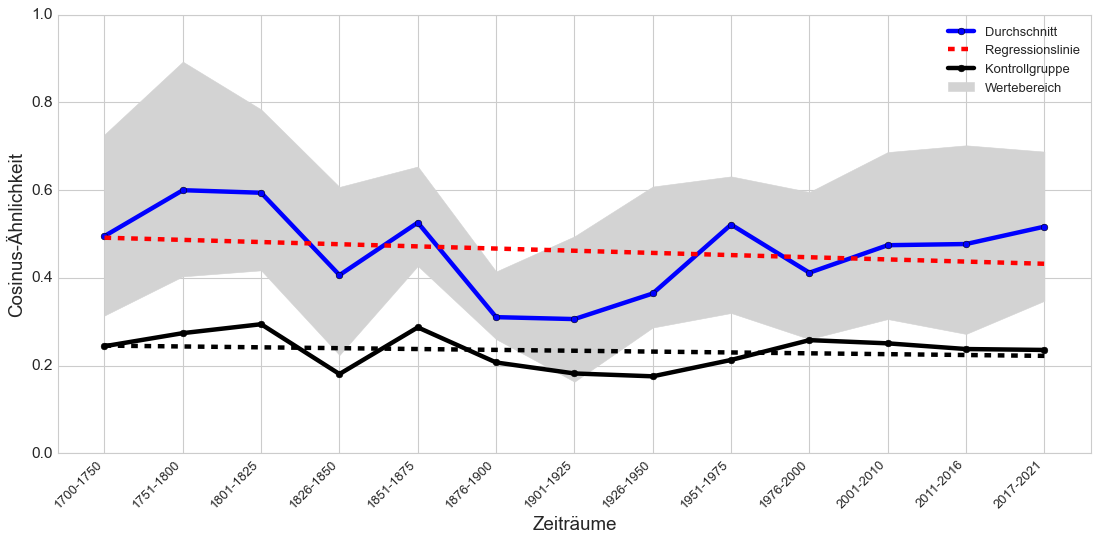

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### formidabilmente

In [36]:
compare_words(periods, models, 'formidabilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,not in vocab,"(dimodo, 0.9192018508911133)","(racchiuso, 0.9329854249954224)","(abbandonati, 0.8524079322814941)","(grimaldello, 0.7310831546783447)","(ubbriachezza, 0.7940500378608704)",not in vocab,"(riconsiderazione, 0.9452390670776367)","(impeto, 0.8115993142127991)","(storpiare, 0.8687427043914795)","(dicotomia, 0.875237226486206)"
1,not in vocab,not in vocab,not in vocab,"(longinque, 0.9182962775230408)","(lapislazzulì, 0.9290275573730469)","(tenor, 0.8512343168258667)","(stendesi, 0.7295180559158325)","(imprimervi, 0.7911911606788635)",not in vocab,"(inaffidabilità, 0.9422953128814697)","(impalpabile, 0.7582413554191589)","(vello, 0.8597964644432068)","(sottigliezza, 0.8732987642288208)"
2,not in vocab,not in vocab,not in vocab,"(forseché, 0.917799174785614)","(cubo, 0.9280407428741455)","(calmato, 0.8509364128112793)","(galliera, 0.7165151238441467)","(impermeabilità, 0.7889664769172668)",not in vocab,"(temperie, 0.9412672519683838)","(mozzare, 0.7572992444038391)","(autodistruttivo, 0.8501321077346802)","(illuminista, 0.8712429404258728)"
3,not in vocab,not in vocab,not in vocab,"(germanica, 0.9156320691108704)","(riposa, 0.9265236258506775)","(ridivenne, 0.8506975173950195)","(tarwar, 0.709705650806427)","(meccanicità, 0.784841001033783)",not in vocab,"(dislocazione, 0.9405522346496582)","(dispensatore, 0.7566065788269043)","(incarnato, 0.8495568633079529)","(chedi, 0.8568640947341919)"
4,not in vocab,not in vocab,not in vocab,"(infestissimo, 0.9155299067497253)","(transversale, 0.9256788492202759)","(mettiamo, 0.8502057790756226)","(siin, 0.7033032774925232)","(astronomicamente, 0.7815480828285217)",not in vocab,"(origene, 0.9371499419212341)","(frusta, 0.7563362121582031)","(rugoso, 0.8484691381454468)","(disgregazione, 0.8559795022010803)"
5,not in vocab,not in vocab,not in vocab,"(sinché, 0.9148561358451843)","(riseghe, 0.9240090847015381)","(piombargli, 0.8500920534133911)","(rivoluzionarismo, 0.7029498815536499)","(ledere, 0.7799398303031921)",not in vocab,"(mitili, 0.9369195103645325)","(munito, 0.7523217797279358)","(satanico, 0.8466102480888367)","(valoriale, 0.8541550636291504)"
6,not in vocab,not in vocab,not in vocab,"(acconce, 0.9136179089546204)","(rientrante, 0.9234068989753723)","(perorazione, 0.8491449356079102)","(appiattite, 0.7007988095283508)","(azoturi, 0.7784205675125122)",not in vocab,"(impressionata, 0.9367757439613342)","(schiavista, 0.7519729733467102)","(mitologico, 0.8440969586372375)","(sembrareil, 0.8533557057380676)"
7,not in vocab,not in vocab,not in vocab,"(antivedere, 0.9120350480079651)","(sempreverde, 0.9231359362602234)","(turb, 0.8487793207168579)","(sfuggitogli, 0.7007549405097961)","(adoperato, 0.7771227955818176)",not in vocab,"(disincarnata, 0.9361479878425598)","(magma, 0.7509227991104126)","(melodrammatico, 0.8419418931007385)","(corporeità, 0.8531025648117065)"
8,not in vocab,not in vocab,not in vocab,"(preservar, 0.9119793176651001)","(insenatura, 0.9219515919685364)","(risorsero, 0.847393810749054)","(radun, 0.6992785334587097)","(galvanizzanti, 0.7769750356674194)",not in vocab,"(nazionalsocialista, 0.935359001159668)","(compaesano, 0.7468311786651611)","(narrante, 0.8416768908500671)","(dannatamente, 0.8500873446464539)"
9,not in vocab,not in vocab,not in vocab,"(fecondativo, 0.9094437956809998)","(dellellisse, 0.9217497110366821)","(presaga, 0.8455184698104858)","(inuno, 0.6988466382026672)","(maximum, 0.7769590020179749)",not in vocab,"(iprite, 0.9353418946266174)","(cibernetico, 0.7457832098007202)","(espressionista, 0.8405453562736511)","(ascetismo, 0.8490641117095947)"


In [37]:
compare_cos(periods, models, 'formidabilmente', 'molto')

{'1826-1850': 0.513445258140564,
 '1851-1875': 0.46472877264022827,
 '1876-1900': 0.5257672667503357,
 '1901-1925': 0.3540331721305847,
 '1926-1950': 0.38987594842910767,
 '1976-2000': 0.5455328226089478,
 '2001-2010': 0.47762641310691833,
 '2011-2016': 0.5016783475875854,
 '2017-2021': 0.543818473815918}

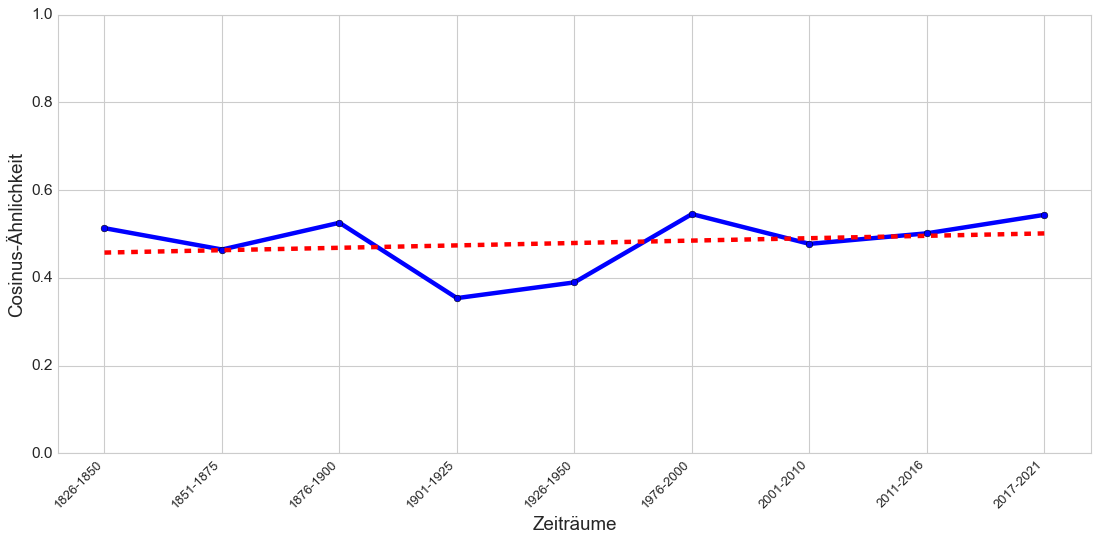

In [38]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'formidabilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [39]:
formidabilmente1 = compare_cos(periods, models, 'formidabilmente', 'angoscia')
formidabilmente2 = compare_cos(periods, models, 'formidabilmente', 'atterrire')
formidabilmente3 = compare_cos(periods, models, 'formidabilmente', 'panico')
formidabilmente4 = compare_cos(periods, models, 'formidabilmente', 'paura')
formidabilmente5 = compare_cos(periods, models, 'formidabilmente', 'raccapricciare')
formidabilmente6 = compare_cos(periods, models, 'formidabilmente', 'schifo')
formidabilmente7 = compare_cos(periods, models, 'formidabilmente', 'sgomentare')
formidabilmente8 = compare_cos(periods, models, 'formidabilmente', 'sgomento')
formidabilmente9 = compare_cos(periods, models, 'formidabilmente', 'spaventare')
formidabilmente10 = compare_cos(periods, models, 'formidabilmente', 'spavento')
formidabilmente11 = compare_cos(periods, models, 'formidabilmente', 'terrore')

In [40]:
formidabilmente_df = pd.DataFrame([formidabilmente1, formidabilmente2, formidabilmente3, formidabilmente4, formidabilmente5, formidabilmente6, formidabilmente7, formidabilmente8, formidabilmente9, formidabilmente10, formidabilmente11])

# Durchschnitt pro Zeitraum
formidabilmente_mean = dict(formidabilmente_df.mean())

# min pro Zeitraum
formidabilmente_min = dict(formidabilmente_df.min())
formidabilmente_min_list = [float(x) for x in list(formidabilmente_min.values())]

#max pro Zeitraum 
formidabilmente_max = dict(formidabilmente_df.max())
formidabilmente_max_list = [float(x) for x in list(formidabilmente_max.values())]

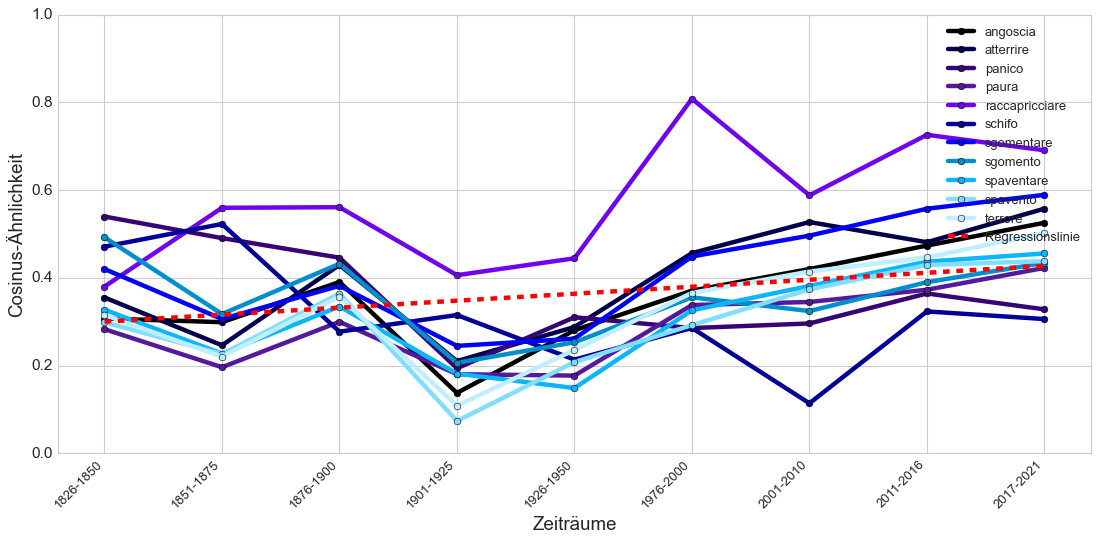

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, formidabilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, formidabilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, formidabilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, formidabilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, formidabilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, formidabilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, formidabilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, formidabilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, formidabilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, formidabilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

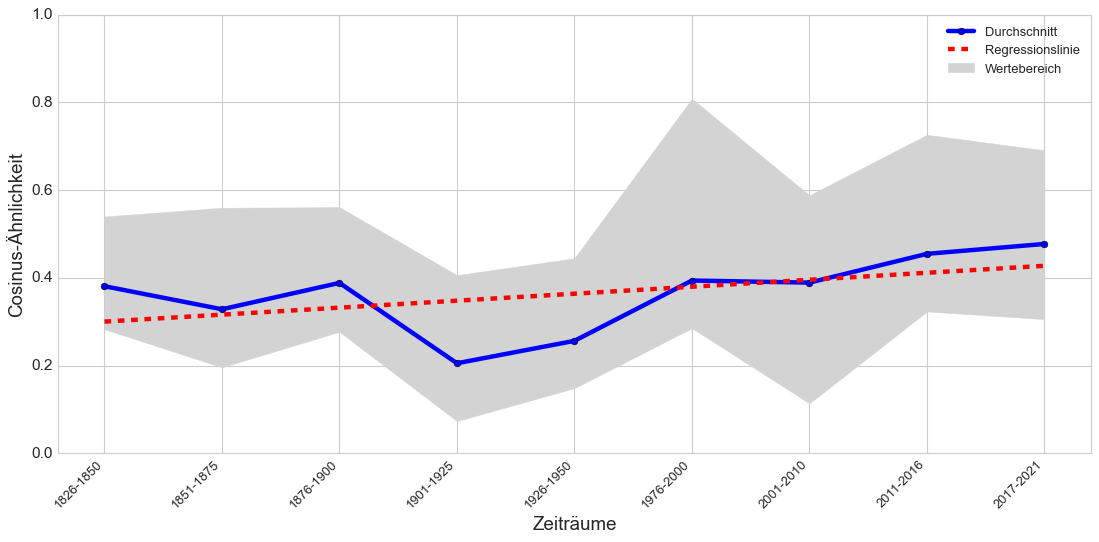

In [42]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, formidabilmente_max_list, formidabilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [43]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(deformare, 0.9487406015396118)",not in vocab,"(gialligna, 0.9042601585388184)","(nerezza, 0.9542942047119141)","(suscettibilità, 0.9078510999679565)","(incredibilmente, 0.7601301074028015)","(agitati, 0.7323226928710938)","(occhialone, 0.7846922278404236)","(sauriani, 0.8781946301460266)","(spaventosamente, 0.7670769691467285)","(irritante, 0.6812310218811035)","(spaventosamente, 0.662468433380127)","(spaventosamente, 0.6563030481338501)"
1,"(revoluzioni, 0.918393075466156)",not in vocab,"(porzioncella, 0.9037380218505859)","(udirti, 0.9210612177848816)","(dissimularlo, 0.9062303900718689)","(laido, 0.7587929368019104)","(veggono, 0.7213804721832275)","(barcolla, 0.7763787508010864)","(sfigurati, 0.759702205657959)","(riconoscibile, 0.7432605624198914)","(spaventosamente, 0.6758924722671509)","(render, 0.655700147151947)","(men, 0.6548011302947998)"
2,"(intrepididell, 0.8609790802001953)",not in vocab,"(abbellirla, 0.9021378755569458)","(gaiezza, 0.9200725555419922)","(assorbente, 0.9036490321159363)","(impudenza, 0.7484638690948486)","(irreparabilmente, 0.7120488882064819)","(aggiustava, 0.7721834182739258)","(risecchiti, 0.7484831809997559)","(surrealista, 0.7420274019241333)","(accapponare, 0.6197490692138672)","(seducente, 0.6436206102371216)","(sadico, 0.6500000953674316)"
3,"(sesti, 0.8451083302497864)",not in vocab,"(trasmodare, 0.8999717235565186)","(cedera, 0.9175835251808167)","(arditezza, 0.9024797677993774)","(spasmodico, 0.747179388999939)","(sognate, 0.7058064341545105)","(zampata, 0.7543948888778687)","(preistorico, 0.74693763256073)","(agile, 0.7409282326698303)","(eccelso, 0.6167005300521851)","(simbiosi, 0.6430503129959106)","(tremendamente, 0.6496105790138245)"
4,"(dallaper, 0.8428910374641418)",not in vocab,"(graduare, 0.899691104888916)","(compatibilissimi, 0.9173247218132019)","(compiangerli, 0.9023838639259338)","(compresso, 0.73578941822052)","(infiammazione, 0.7016984224319458)","(sècoli, 0.73915034532547)","(petalo, 0.7430047392845154)","(somigliante, 0.7401703596115112)","(testardo, 0.6130568981170654)","(bruttura, 0.6418282389640808)","(illogico, 0.6462584733963013)"
5,"(gesuitismo, 0.8415237665176392)",not in vocab,"(maravigliarsene, 0.8977221846580505)","(cosiffatto, 0.9165099263191223)","(risolutezza, 0.9019025564193726)","(resistente, 0.7351564168930054)","(suggesto, 0.6928638219833374)","(grugnire, 0.7388808131217957)","(appiccicaticcia, 0.7416164875030518)","(sviluppato, 0.7363169193267822)","(unocosì, 0.6099154353141785)","(annoiare, 0.6389111876487732)","(puzzare, 0.6384057998657227)"
6,"(direall, 0.8407288193702698)",not in vocab,"(viziati, 0.8966100811958313)","(dannaggio, 0.915735125541687)","(giustificabile, 0.9013745188713074)","(movesse, 0.7349037528038025)","(audizione, 0.6896600127220154)","(lividore, 0.7347154021263123)","(ingioiellati, 0.7351054549217224)","(irraggiungibile, 0.7362600564956665)","(meravigliosamente, 0.6031105518341064)","(carburatore, 0.6338234543800354)","(gibson, 0.6354174017906189)"
7,"(aministrano, 0.8401708602905273)",not in vocab,"(dipingerne, 0.8953793048858643)","(avvedervene, 0.9154998064041138)","(stolido, 0.9012775421142578)","(virile, 0.732643187046051)","(procreazione, 0.6887898445129395)","(avvallarsi, 0.7331955432891846)","(rattoppati, 0.7322121858596802)","(leggibile, 0.7354282140731812)","(tizia, 0.6015998721122742)","(cromo, 0.6328279972076416)","(insipido, 0.6346033215522766)"
8,"(enlla, 0.8401156067848206)",not in vocab,"(compararlo, 0.8952293992042542)","(abbi, 0.9154943227767944)","(doppiezza, 0.9011346101760864)","(spirante, 0.7313807606697083)","(edificazione, 0.6882274150848389)","(avvolgendolo, 0.7276557683944702)","(navigabile, 0.7279366850852966)","(evanescente, 0.7352789044380188)","(malapena, 0.599587619304657)","(sottilmente, 0.6298674941062927)","(sushi, 0.6282046437263489)"
9,"(rivoltatosi, 0.8388397

In [44]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.503598153591156,
 '1801-1825': 0.5274044275283813,
 '1826-1850': 0.5234488248825073,
 '1851-1875': 0.5921367406845093,
 '1876-1900': 0.4369969367980957,
 '1901-1925': 0.4148024916648865,
 '1926-1950': 0.3249325454235077,
 '1951-1975': 0.37329617142677307,
 '1976-2000': 0.5931431651115417,
 '2001-2010': 0.48892098665237427,
 '2011-2016': 0.47474318742752075,
 '2017-2021': 0.44457805156707764}

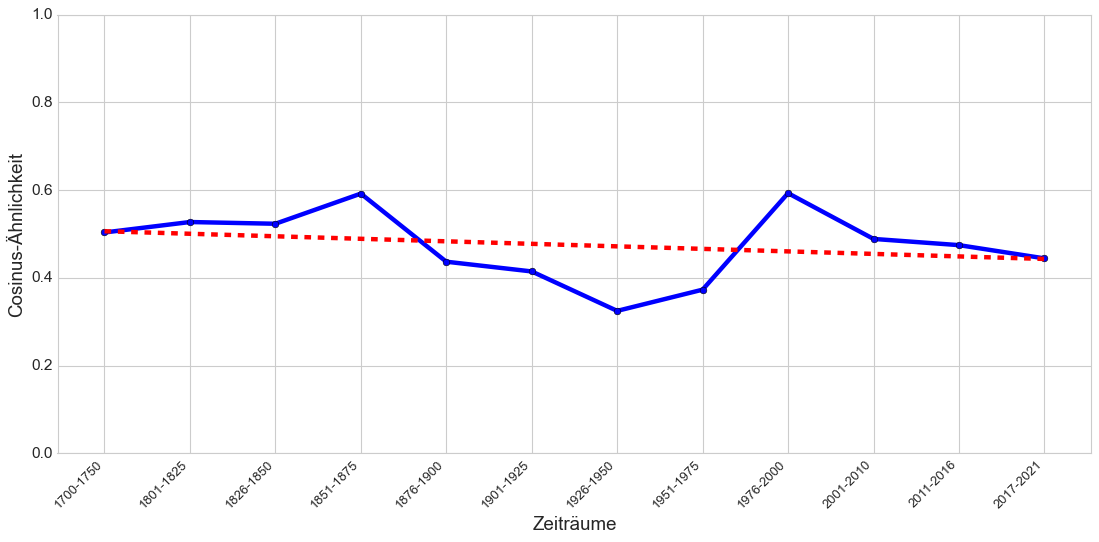

In [45]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [46]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [47]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

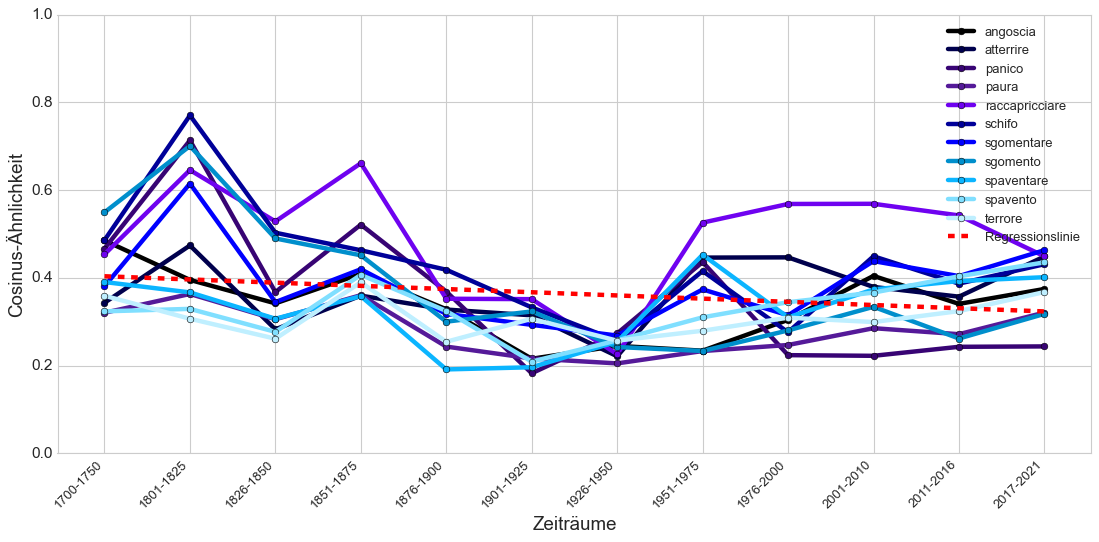

In [48]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

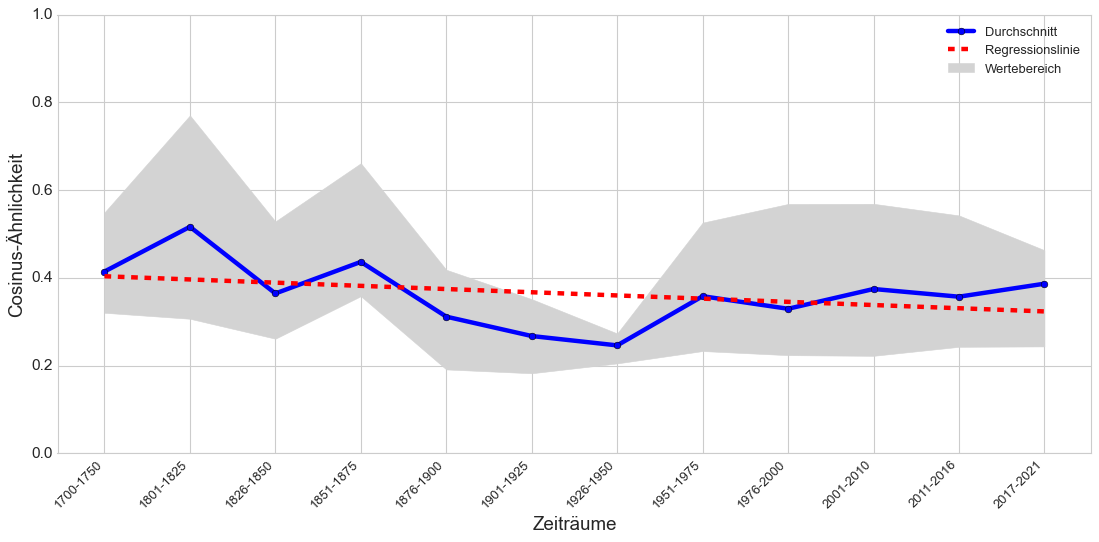

In [49]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [50]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(lavarlo, 0.975037693977356)",not in vocab,"(rumoreggiare, 0.8962401151657104)","(invasata, 0.8706651926040649)","(dilatato, 0.9086887836456299)","(bronco, 0.7169663310050964)","(mutilare, 0.7467585206031799)","(sgomitolate, 0.7223373055458069)","(piagare, 0.8503769040107727)","(mutilare, 0.8236234188079834)","(mutilare, 0.8066361546516418)","(mutilare, 0.841249942779541)","(mutilare, 0.7899121642112732)"
1,"(bagn, 0.9689759612083435)",not in vocab,"(austri, 0.8943871855735779)","(deturpata, 0.8284741044044495)","(stravolgere, 0.8999797105789185)","(fucci, 0.6907070279121399)","(ischeletrito, 0.7370637655258179)","(cadevan, 0.7216197848320007)","(crocifissi, 0.8477300405502319)","(mutilato, 0.7983151078224182)","(orribilmente, 0.7639918327331543)","(straziare, 0.7707467675209045)","(orribilmente, 0.7704728245735168)"
2,"(omicido, 0.9325219392776489)",not in vocab,"(arcoli, 0.8933391571044922)","(atre, 0.8268142342567444)","(ghiacciato, 0.8729133009910583)","(malconcio, 0.6890552639961243)","(deturpato, 0.7340240478515625)","(avvertiva, 0.7102392315864563)","(sanguinolento, 0.8217692971229553)","(sfigurati, 0.7769731283187866)","(sfigurato, 0.753385603427887)","(orribilmente, 0.7587681412696838)","(sfigurato, 0.7578291296958923)"
3,"(punio, 0.9280704259872437)",not in vocab,"(scotendo, 0.8902772068977356)","(trafitto, 0.8244112730026245)","(vermiglia, 0.8720137476921082)","(dragone, 0.6887689828872681)","(ruggiva, 0.7334086894989014)","(avvicinava, 0.6797030568122864)","(stesi, 0.7802638411521912)","(sfigurato, 0.7752657532691956)","(sfigurare, 0.7257483601570129)","(sfigurato, 0.7552458643913269)","(seviziare, 0.7563148736953735)"
4,"(mostrolle, 0.9268316030502319)",not in vocab,"(mugghiare, 0.886781632900238)","(balzar, 0.8173048496246338)","(tagliente, 0.8709359169006348)","(potersene, 0.6887689232826233)","(felino, 0.7280561327934265)","(sozzura, 0.6779035925865173)","(questuare, 0.7767190337181091)","(orribilmente, 0.7685813307762146)","(deformare, 0.7230266332626343)","(livido, 0.727690577507019)","(sfigurare, 0.7520179748535156)"
5,"(moncone, 0.9263332486152649)",not in vocab,"(viator, 0.8865838646888733)","(nocchier, 0.8163865208625793)","(ruggire, 0.8692042231559753)","(carneficina, 0.6880178451538086)","(insanguinare, 0.7266735434532166)","(granil, 0.6728734970092773)","(ululii, 0.7681607604026794)","(straziato, 0.745589017868042)","(sfigurati, 0.7127872109413147)","(seviziare, 0.7242155075073242)","(deturpare, 0.7429788708686829)"
6,"(mbusto, 0.9257153272628784)",not in vocab,"(risonante, 0.8854770660400391)","(adriaca, 0.812197744846344)","(pallidezza, 0.8685238361358643)","(artiglio, 0.6860752701759338)","(inerme, 0.7262675762176514)","(addome, 0.6685381531715393)","(raggiuntala, 0.7654432058334351)","(rinvenire, 0.743276834487915)","(martoriare, 0.7093717455863953)","(riverso, 0.7230386734008789)","(straziare, 0.726165235042572)"
7,"(speglisi, 0.9242520332336426)",not in vocab,"(esce, 0.8847625851631165)","(segn, 0.8120228052139282)","(sfavillare, 0.8669582605361938)","(gittarsi, 0.6831424236297607)","(spaccare, 0.716032087802887)","(brulica, 0.6570987701416016)","(fradice, 0.7642247676849365)","(torturato, 0.7418038249015808)","(atrocemente, 0.6985138654708862)","(ondeggiare, 0.7206665277481079)","(giacere, 0.7157517671585083)"
8,"(chiedesse, 0.9237701296806335)",not in vocab,"(silenzi, 0.8832411170005798)","(magion, 0.8105399012565613)","(macchiato, 0.8665346503257751)","(sanguinolento, 0.6809729933738708)","(massacrare, 0.7138516902923584)","(putridume, 0.6570421457290649)","(turate, 0.7633846998214722)","(carbonizzare, 0.7275072336196899)","(straziato, 0.6939752697944641)","(macabro, 0.7190268635749817)","(straziato, 0.6948814988136292)"
9,"(sbranarlo, 0.923312246799469)",not in vocab,"(fòlgori, 0.8828369379043579)","(gradivo, 0.8070150017738342)","(inumidire, 0.8652642965316772

In [51]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1700-1750': 0.4032423496246338,
 '1801-1825': 0.35365030169487,
 '1826-1850': 0.315959632396698,
 '1851-1875': 0.4982697367668152,
 '1876-1900': 0.34367603063583374,
 '1901-1925': 0.2691475749015808,
 '1926-1950': 0.20177705585956573,
 '1951-1975': 0.19245368242263794,
 '1976-2000': 0.25363388657569885,
 '2001-2010': 0.28402337431907654,
 '2011-2016': 0.26418763399124146,
 '2017-2021': 0.2385590821504593}

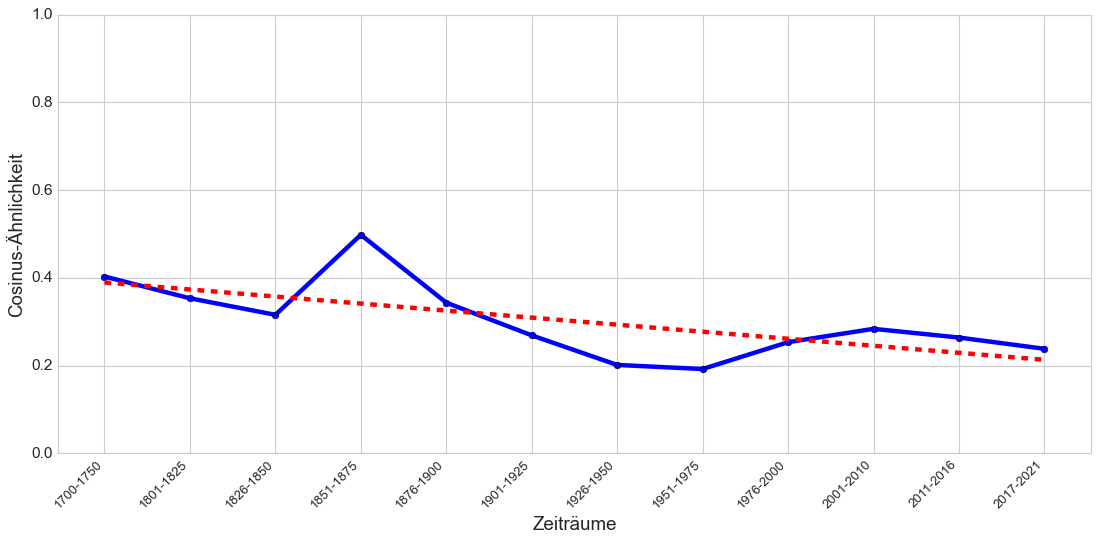

In [52]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [53]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [54]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

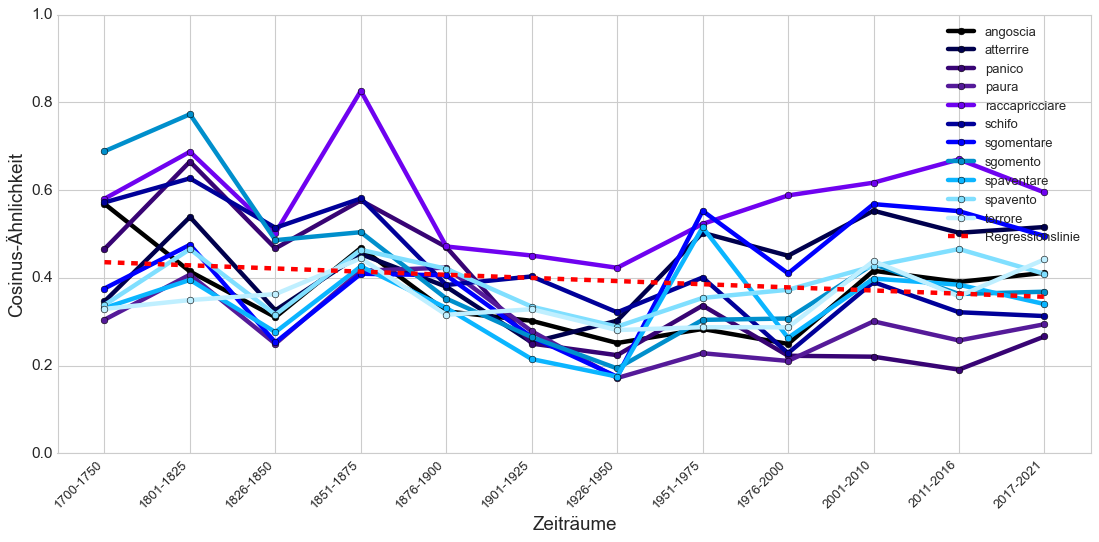

In [55]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

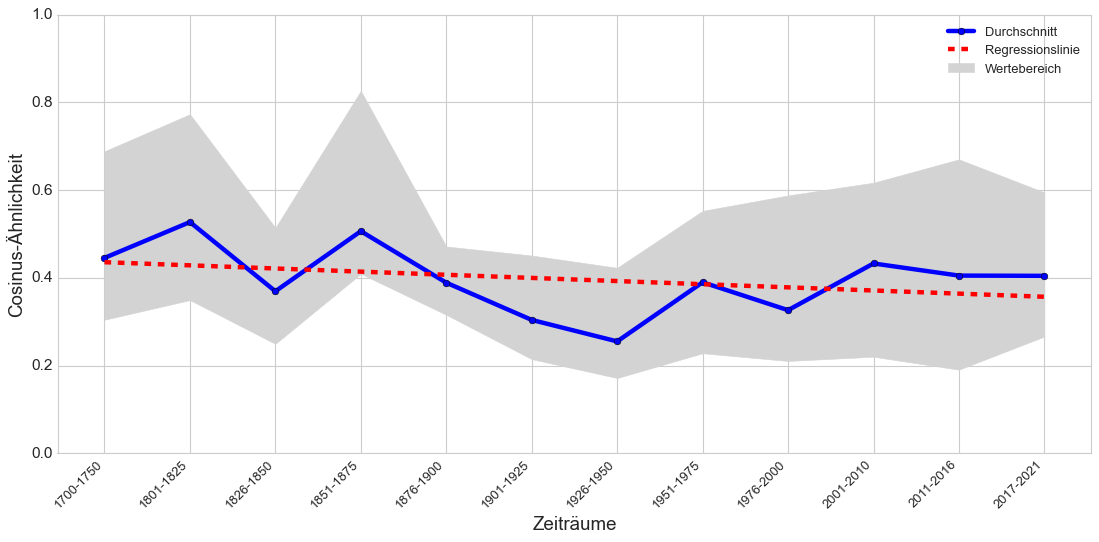

In [56]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [57]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(fremer, 0.7673113346099854)","(unguento, 0.8459750413894653)","(gel, 0.7848758697509766)","(montagne, 0.7374781966209412)","(digrignare, 0.7779067754745483)","(dragone, 0.5692988634109497)","(tracollaron, 0.5549684762954712)","(imbavagliare, 0.6218646764755249)","(trasformarvisi, 0.7108752131462097)","(sfigurato, 0.770544171333313)","(orrendamente, 0.7639917135238647)","(orrendamente, 0.7587680816650391)","(orrendamente, 0.7704728245735168)"
1,"(scuote, 0.7658395171165466)","(teschio, 0.83591228723526)","(innaspettata, 0.777780294418335)","(penuriosissimi, 0.7184441685676575)","(orrendamente, 0.7567222714424133)","(scoverto, 0.5681114196777344)","(insolazioni, 0.5523377060890198)","(ghermiva, 0.6182162165641785)","(strutto, 0.6913534998893738)","(orrendamente, 0.7685811519622803)","(mutilare, 0.7043543457984924)","(mutilare, 0.7255927324295044)","(sfigurato, 0.7455772757530212)"
2,"(balzan, 0.764773428440094)","(fischiare, 0.8333896398544312)","(scura, 0.7774216532707214)","(artiglierìe, 0.7065603733062744)","(convulsione, 0.754296064376831)","(ruggire, 0.559768557548523)","(ruggiva, 0.5520266890525818)","(infocate, 0.6056956052780151)","(circolarvi, 0.68595290184021)","(mutilare, 0.7551807165145874)","(atrocemente, 0.6999788880348206)","(sfigurato, 0.7051669359207153)","(mutilare, 0.739958643913269)"
3,"(ancisi, 0.7603507041931152)","(solco, 0.8296748399734497)","(adamantino, 0.7764383554458618)","(rimbombar, 0.7058848142623901)","(stravolgere, 0.7502639293670654)","(sbuffi, 0.5479654669761658)","(rummo, 0.5429937839508057)","(ossesso, 0.6040289402008057)","(granturco, 0.6852185130119324)","(torturato, 0.7499966025352478)","(sfigurare, 0.6739314794540405)","(straziare, 0.6909201145172119)","(atrocemente, 0.7371228933334351)"
4,"(fragoso, 0.759011447429657)","(squarciate, 0.8275565505027771)","(sanguigna, 0.7763943076133728)","(abiti, 0.7046388387680054)","(marraiuolo, 0.7230932712554932)","(entrativi, 0.5469304919242859)","(deformerò, 0.5351222157478333)","(rantolare, 0.6031078100204468)","(ombelicale, 0.6844918131828308)","(straziato, 0.7334831953048706)","(sfigurato, 0.6737794280052185)","(deformare, 0.6765809059143066)","(giacere, 0.7162901759147644)"
5,"(squarciate, 0.7567349076271057)","(gel, 0.8268179297447205)","(mordrec, 0.7730878591537476)","(grandine, 0.6885726451873779)","(sanguigno, 0.7190250754356384)","(livido, 0.5447924137115479)","(mutilare, 0.5347945690155029)","(abbandonasti, 0.6022401452064514)","(infuocato, 0.6807565093040466)","(mutilato, 0.730916440486908)","(deformare, 0.6408897638320923)","(atrocemente, 0.6744477152824402)","(sfigurare, 0.7135268449783325)"
6,"(sfida, 0.7563733458518982)","(antenna, 0.8267543911933899)","(lordare, 0.7726348638534546)","(cava, 0.6826488971710205)","(pallidezza, 0.7187516689300537)","(bargello, 0.5440885424613953)","(imo, 0.5315174460411072)","(spennare, 0.5907049775123596)","(melma, 0.6783754825592041)","(mutilati, 0.7268807888031006)","(atterrita, 0.6287063360214233)","(macabro, 0.6670570969581604)","(deturpare, 0.7002071738243103)"
7,"(tartaree, 0.7552366256713867)","(cocito, 0.8254897594451904)","(guanciali, 0.7718008756637573)","(sfracellare, 0.6824450492858887)","(tremito, 0.7108460068702698)","(carneficina, 0.5421198606491089)","(zuccone, 0.530575692653656)","(impensierite, 0.5895800590515137)","(brac, 0.6771079301834106)","(rinvenire, 0.7236939072608948)","(nerastro, 0.6127629280090332)","(livido, 0.6666026711463928)","(seviziare, 0.693644106388092)"
8,"(sultan, 0.75435471534729)","(volan, 0.8228161334991455)","(chiarit, 0.7711104154586792)","(grandinare, 0.6795260906219482)","(mascella, 0.7076625823974609)","(sfigurato, 0.5418255925178528)","(sfigurare, 0.5232160091400146)","(capeadores, 0.5821714997291565)","(verica, 0.6704260110855103)","(sfigurati, 0.7223578095436096)","(torturare, 0.6098378896713257)","(raccapricciare, 0.6609

In [58]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.190555140376091,
 '1751-1800': 0.3126208186149597,
 '1801-1825': 0.3818008303642273,
 '1826-1850': 0.2850068509578705,
 '1851-1875': 0.4014376699924469,
 '1876-1900': 0.3201260268688202,
 '1901-1925': 0.26473569869995117,
 '1926-1950': 0.296583890914917,
 '1951-1975': 0.21827302873134613,
 '1976-2000': 0.29403096437454224,
 '2001-2010': 0.27025195956230164,
 '2011-2016': 0.2477496862411499,
 '2017-2021': 0.26491615176200867}

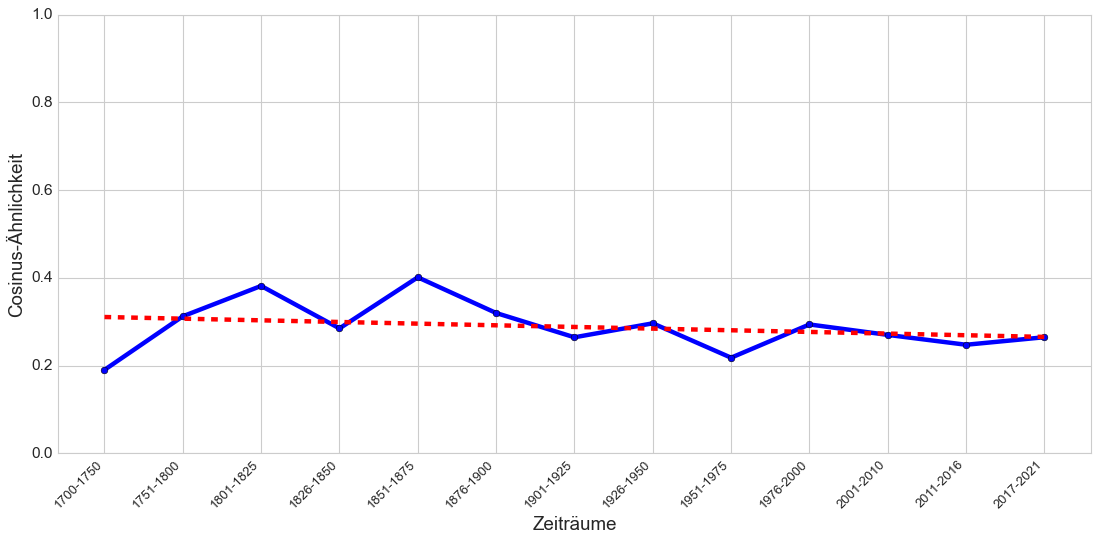

In [59]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [60]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [61]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

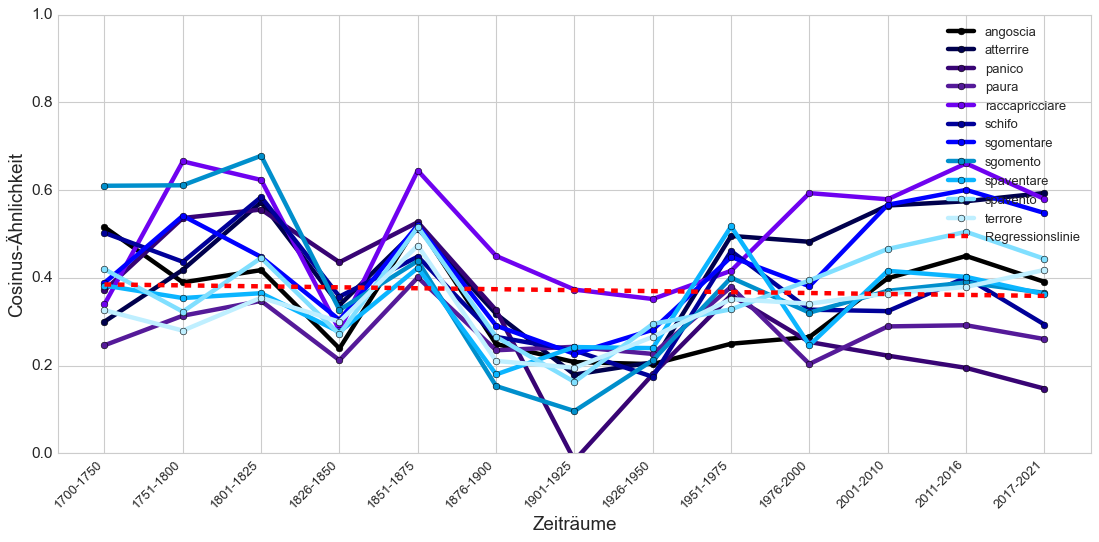

In [62]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

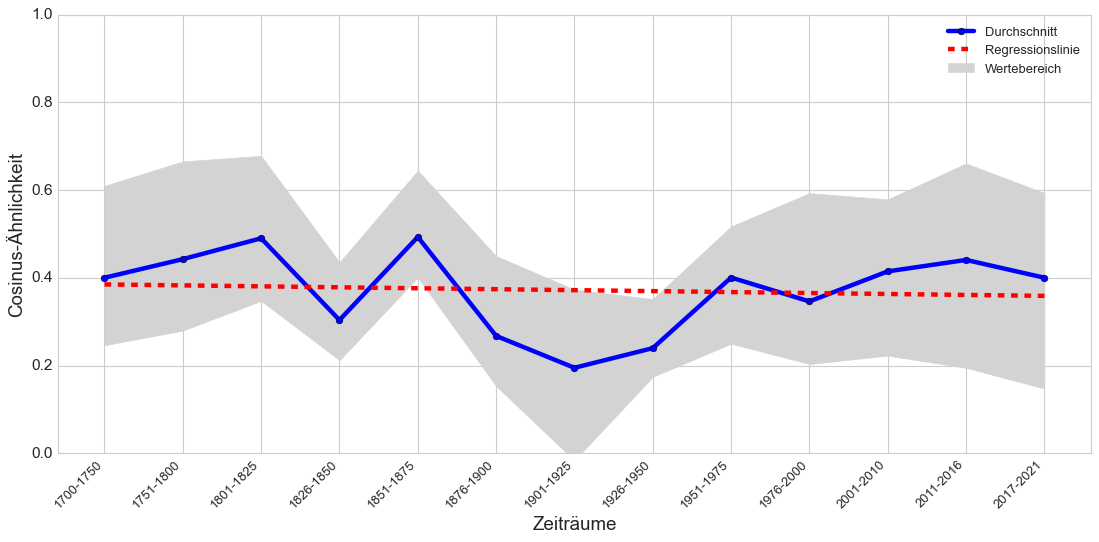

In [63]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [64]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(pestilenza, 0.8095425963401794)","(repristinavasi, 0.9914748668670654)","(numidi, 0.9496707916259766)","(sentendoli, 0.9542079567909241)","(sfolgorare, 0.8590311408042908)","(parossismo, 0.7352495789527893)","(ruggiva, 0.6199122667312622)","(pronunziarlo, 0.6420519948005676)","(belluina, 0.7231729626655579)","(mostruosamente, 0.7670767903327942)","(mostruosamente, 0.6758925318717957)","(mostruosamente, 0.6624685525894165)","(mostruosamente, 0.6563030481338501)"
1,"(sacrilega, 0.7659420967102051)","(colimbo, 0.9501446485519409)","(spezzate, 0.9400779604911804)","(bisognò, 0.9520977735519409)","(mitraglia, 0.8395208120346069)","(riscossa, 0.7183355689048767)","(pavidità, 0.6190515756607056)","(tanaglia, 0.6087478399276733)","(omone, 0.7008318305015564)","(somigliante, 0.7430451512336731)","(orribilmente, 0.6081742644309998)","(terribilmente, 0.6433718800544739)","(terribilmente, 0.6351081132888794)"
2,"(restaurare, 0.764742374420166)","(succede, 0.9412327408790588)","(ricuoprono, 0.9389897584915161)","(insepolto, 0.9167917966842651)","(fioccare, 0.8394169211387634)","(fulmineo, 0.7149919271469116)","(rovesciandolo, 0.6065247654914856)","(dilatate, 0.6047296524047852)","(ciarliero, 0.679871141910553)","(ahimè, 0.7231341600418091)","(tremendamente, 0.6023057699203491)","(simil, 0.6336334943771362)","(tremendamente, 0.6220305562019348)"
3,"(vomitate, 0.7635385990142822)","(alcone, 0.9336612820625305)","(miran, 0.9375551342964172)","(disseppellire, 0.9106221795082092)","(terrapieno, 0.8382670879364014)","(forsennato, 0.714330792427063)","(slegò, 0.604414165019989)","(impietrire, 0.5983203649520874)","(imponentissime, 0.6712205410003662)","(immerso, 0.7213653922080994)","(terribilmente, 0.5965774059295654)","(oscurità, 0.6306402683258057)","(illogico, 0.6196246147155762)"
4,"(eruzione, 0.7630716562271118)","(bagnarci, 0.9332784414291382)","(schierati, 0.9373906254768372)","(putredine, 0.8590701222419739)","(marosi, 0.8364731073379517)","(carneficina, 0.7114532589912415)","(livido, 0.6019760966300964)","(ipnotizzante, 0.5921837091445923)","(galoppare, 0.661675214767456)","(arido, 0.7153459787368774)","(atrocemente, 0.5803195834159851)","(seducente, 0.6276470422744751)","(monotono, 0.6184427738189697)"
5,"(tremuoti, 0.7585992813110352)","(risvegliamento, 0.933252215385437)","(ergesi, 0.9373748898506165)","(maneggiarsi, 0.8551194667816162)","(retrocedere, 0.8311663269996643)","(fiaccare, 0.7084317803382874)","(yokara, 0.5966728329658508)","(stravolto, 0.5905041694641113)","(estorti, 0.6282955408096313)","(cavità, 0.7142342329025269)","(irritante, 0.564716100692749)","(tetro, 0.6234799027442932)","(immutabile, 0.6161972880363464)"
6,"(tremuoto, 0.7484079003334045)","(scoppia, 0.9318504333496094)","(stendon, 0.9370695948600769)","(sfracellare, 0.8530302047729492)","(canavaggia, 0.8305903077125549)","(intrepido, 0.705424964427948)","(burrascosamente, 0.5960679054260254)","(uccelletto, 0.5843695998191833)","(lasciandoti, 0.6209552884101868)","(semplicità, 0.7065081596374512)","(dilatare, 0.5605224370956421)","(rettile, 0.619147002696991)","(riflessivo, 0.6160979866981506)"
7,"(riempierono, 0.7404418587684631)","(pennuto, 0.9313732981681824)","(rovesciate, 0.9355428814888)","(scheggie, 0.8509523868560791)","(gragnuola, 0.8277039527893066)","(lacerante, 0.7051600813865662)","(mazzolata, 0.5932765007019043)","(inorridire, 0.5823323130607605)","(immoto, 0.6192994117736816)","(irraggiungibile, 0.7056652903556824)","(pulsare, 0.5600835084915161)","(bruttura, 0.6156295537948608)","(elfo, 0.608078122138977)"
8,"(allagare, 0.7380583882331848)","(riprendea, 0.9296988844871521)","(impenna, 0.9354698657989502)","(sommerso, 0.8429387211799622)","(imperversare, 0.8270602822303772)","(mostruosamente, 0.7048287391662598)","(agonizzare, 0.5922853350639343)","(barrire, 0.5817157030105591)","(grama, 0.618535041809082)","(linea

In [65]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.3521619439125061,
 '1751-1800': 0.4743823707103729,
 '1801-1825': 0.33896404504776,
 '1826-1850': 0.38283759355545044,
 '1851-1875': 0.4344184994697571,
 '1876-1900': 0.4174295961856842,
 '1901-1925': 0.29041993618011475,
 '1926-1950': 0.272845059633255,
 '1951-1975': 0.3129591643810272,
 '1976-2000': 0.5507693290710449,
 '2001-2010': 0.40839487314224243,
 '2011-2016': 0.435946524143219,
 '2017-2021': 0.45358404517173767}

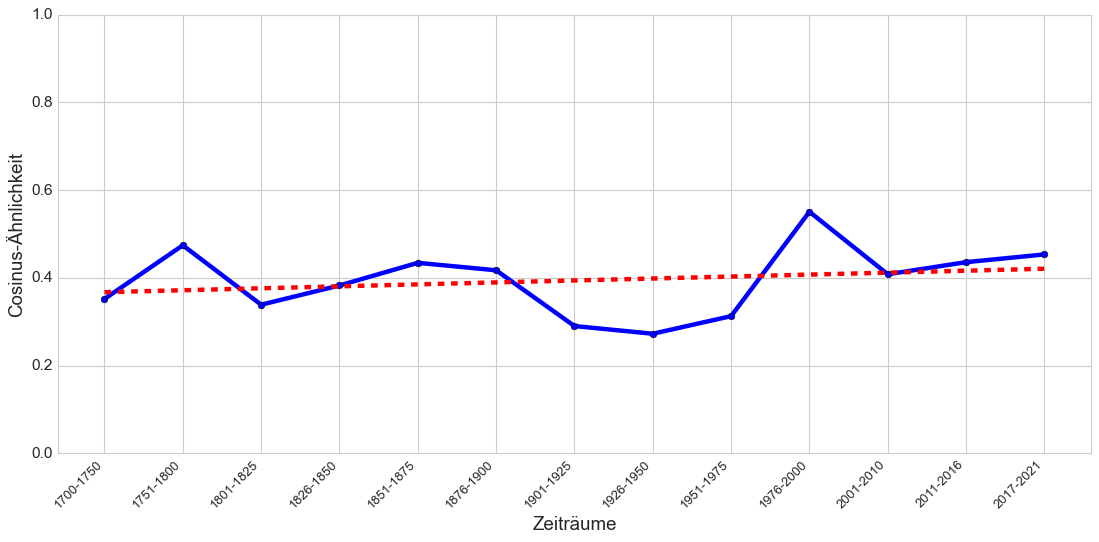

In [66]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

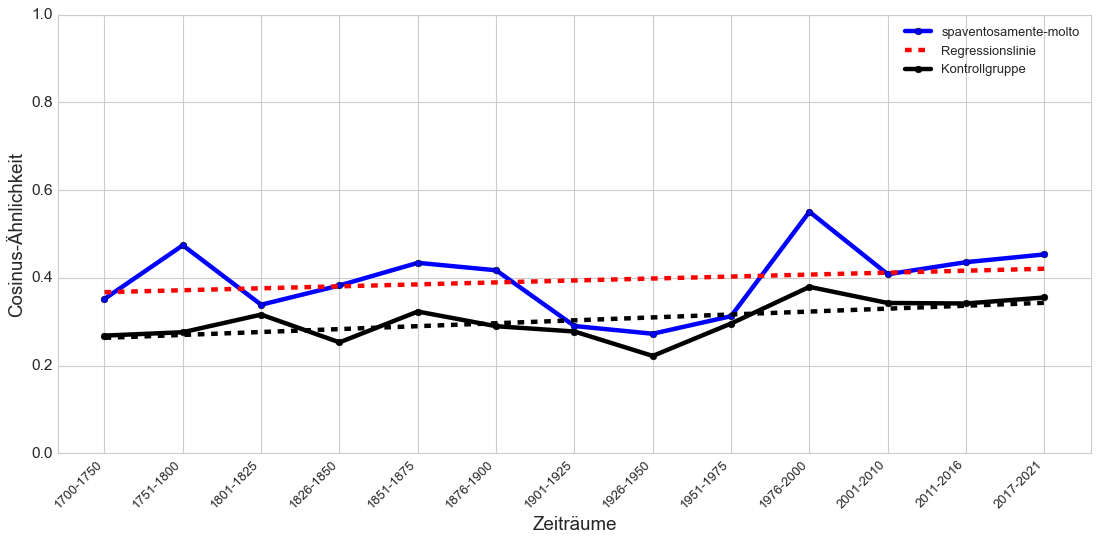

In [67]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [68]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [69]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

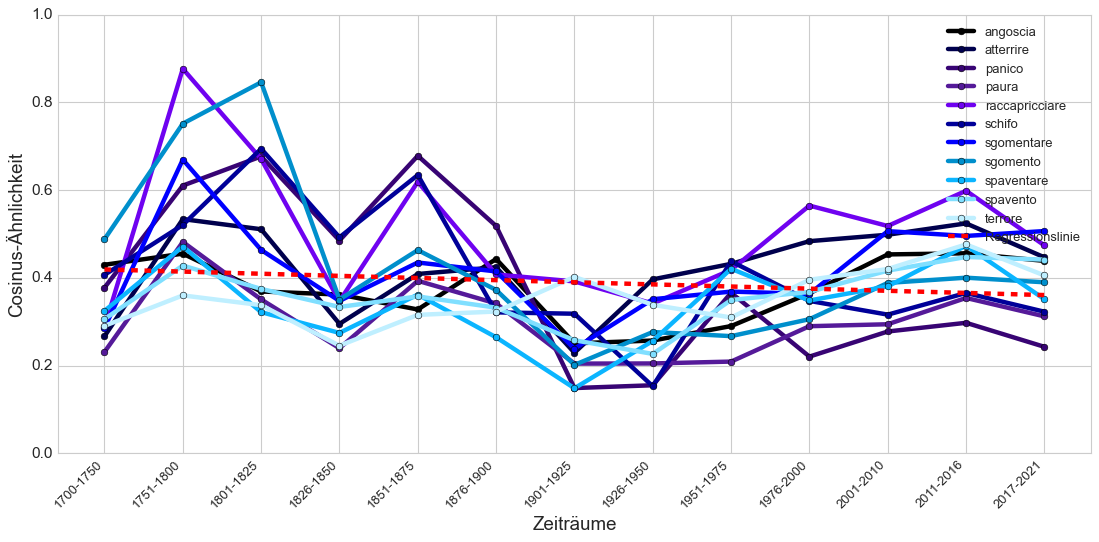

In [70]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

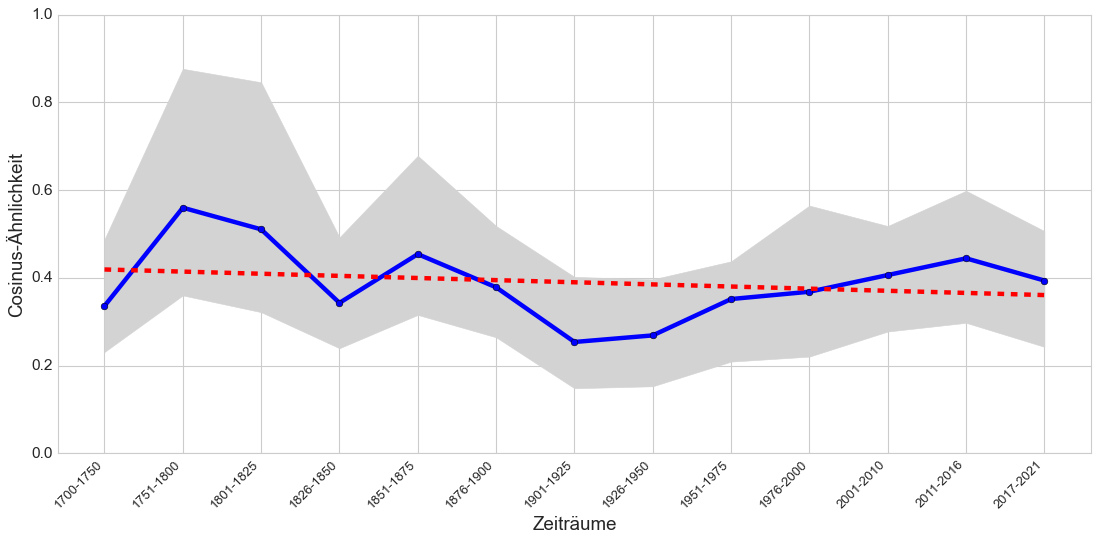

In [71]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

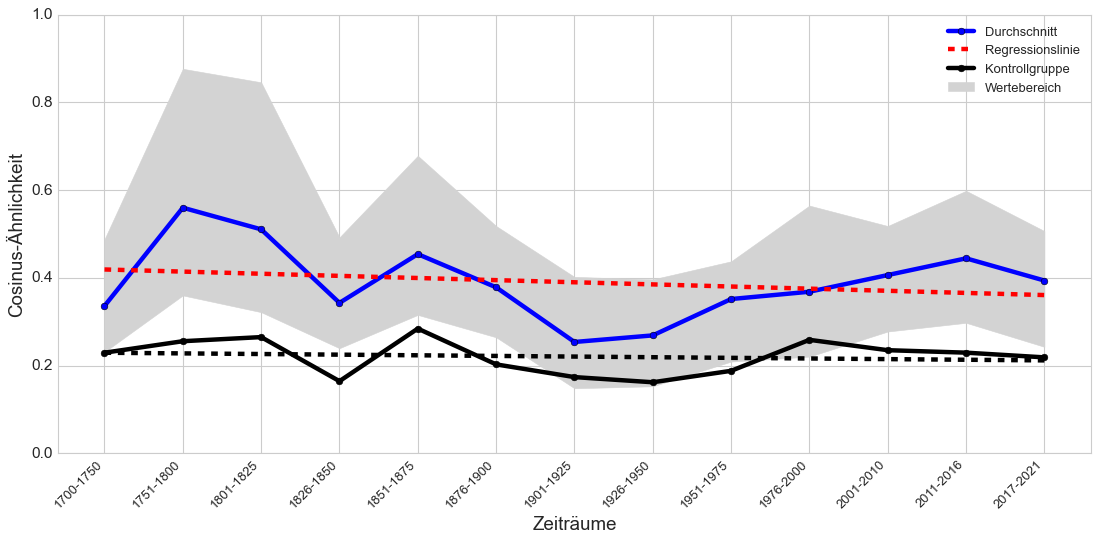

In [72]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [73]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(mortalità, 0.8235445022583008)","(fuldenses, 0.8154041767120361)","(acciecato, 0.816234827041626)","(maltrattati, 0.7393440008163452)","(sentivasi, 0.7560884356498718)","(leonessa, 0.5959937572479248)","(zuccone, 0.5746477842330933)","(divago, 0.5761375427246094)","(rimaste, 0.6181217432022095)","(tremendamente, 0.770435094833374)","(tremendamente, 0.7384172081947327)","(tremendamente, 0.7644439935684204)","(tremendamente, 0.7532644867897034)"
1,"(squarcio, 0.8160115480422974)","(laureshamenses, 0.806685745716095)","(opprimeva, 0.8129638433456421)","(scoprir, 0.7182488441467285)","(amina, 0.7342565059661865)","(topine, 0.5793921947479248)","(rivivessi, 0.5518297553062439)","(incomposto, 0.5704385042190552)","(unonon, 0.6063405275344849)","(estremamente, 0.5425076484680176)","(spaventosamente, 0.5965772867202759)","(spaventosamente, 0.6433718204498291)","(spaventosamente, 0.6351081132888794)"
2,"(olmutz, 0.8013302683830261)","(teofane, 0.7656639218330383)","(moltosuo, 0.8126834630966187)","(riducevasi, 0.7067349553108215)","(convulso, 0.7225431203842163)","(abbattuto, 0.5636423230171204)","(nominargli, 0.5493059158325195)","(marzocco, 0.547197163105011)","(pover, 0.6003959774971008)","(mostruosamente, 0.5310206413269043)","(atrocemente, 0.5831978917121887)","(mostruosamente, 0.602867603302002)","(noioso, 0.614250123500824)"
3,"(forlimpopoli, 0.7966247797012329)","(angustiati, 0.7595558166503906)","(ilse, 0.8097140192985535)","(ila, 0.7007080912590027)","(siil, 0.7205979228019714)","(glandole, 0.5597985982894897)","(vanamente, 0.5429845452308655)","(opprimendolo, 0.5388620495796204)","(palpai, 0.5915865302085876)","(complicare, 0.530010998249054)","(noioso, 0.5616462826728821)","(orribilmente, 0.6015595197677612)","(infelicità, 0.6056565642356873)"
4,"(cesena, 0.7950099110603333)","(laconico, 0.7333679795265198)","(androne, 0.8074870705604553)","(servir, 0.7006167769432068)","(stravolto, 0.7154077291488647)","(ruggire, 0.556704580783844)","(andromaco, 0.5414137244224548)","(maceri, 0.5284215211868286)","(indecente, 0.5825124979019165)","(goffo, 0.5236670970916748)","(mostruosamente, 0.5446562767028809)","(noioso, 0.5853643417358398)","(mostruosamente, 0.6048487424850464)"
5,"(cicilia, 0.7942514419555664)","(niceforo, 0.7157266139984131)","(intorbidite, 0.8039448261260986)","(pontificj, 0.7001612782478333)","(annichilire, 0.7139388918876648)","(sentesi, 0.5564759969711304)","(ninotto, 0.534035325050354)","(incisa, 0.52311110496521)","(unome, 0.581961989402771)","(egoista, 0.5204166173934937)","(irritante, 0.5266624093055725)","(annoiare, 0.5628622174263)","(sadico, 0.6034762859344482)"
6,"(istetteroa, 0.787938117980957)","(giudei, 0.7103769779205322)","(strappazzi, 0.8027654886245728)","(spauracchio, 0.6991814970970154)","(salirmi, 0.7117275595664978)","(carneficina, 0.5540575385093689)","(odiava, 0.5319157838821411)","(passacantando, 0.5222996473312378)","(trepidare, 0.5754437446594238)","(ingenuo, 0.5098032355308533)","(orribilmente, 0.5257336497306824)","(seducente, 0.5567264556884766)","(dannatamente, 0.6032941341400146)"
7,"(sciabola, 0.7812696695327759)","(barbarico, 0.700090229511261)","(sintoma, 0.7987780570983887)","(esplosione, 0.6989688277244568)","(occhi, 0.7092524170875549)","(fiaccare, 0.5536378026008606)","(egle, 0.5169698596000671)","(astanti, 0.521467387676239)","(afflosciati, 0.5737789273262024)","(serioso, 0.5093482732772827)","(meravigliosamente, 0.5146547555923462)","(bruttura, 0.5486307740211487)","(illogico, 0.6022859215736389)"
8,"(traversarono, 0.7802407145500183)","(vespasiana, 0.6927469372749329)","(taciturnità, 0.7976716160774231)","(tormentato, 0.6977615356445312)","(afferrarmi, 0.7092456817626953)","(annientare, 0.5473821759223938)","(vendicare, 0.5124496817588806)","(riconoscendomi, 0.5179136395454407)","(batticuore, 0.573006808757782)","(scialbo, 0.5088244676589966)

In [74]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.3741056025028229,
 '1751-1800': 0.3593963086605072,
 '1801-1825': 0.5257879495620728,
 '1826-1850': 0.4320918023586273,
 '1851-1875': 0.4650757908821106,
 '1876-1900': 0.30948442220687866,
 '1901-1925': 0.3228362500667572,
 '1926-1950': 0.23102498054504395,
 '1951-1975': 0.35949793457984924,
 '1976-2000': 0.4831219017505646,
 '2001-2010': 0.3997482657432556,
 '2011-2016': 0.38060277700424194,
 '2017-2021': 0.43355363607406616}

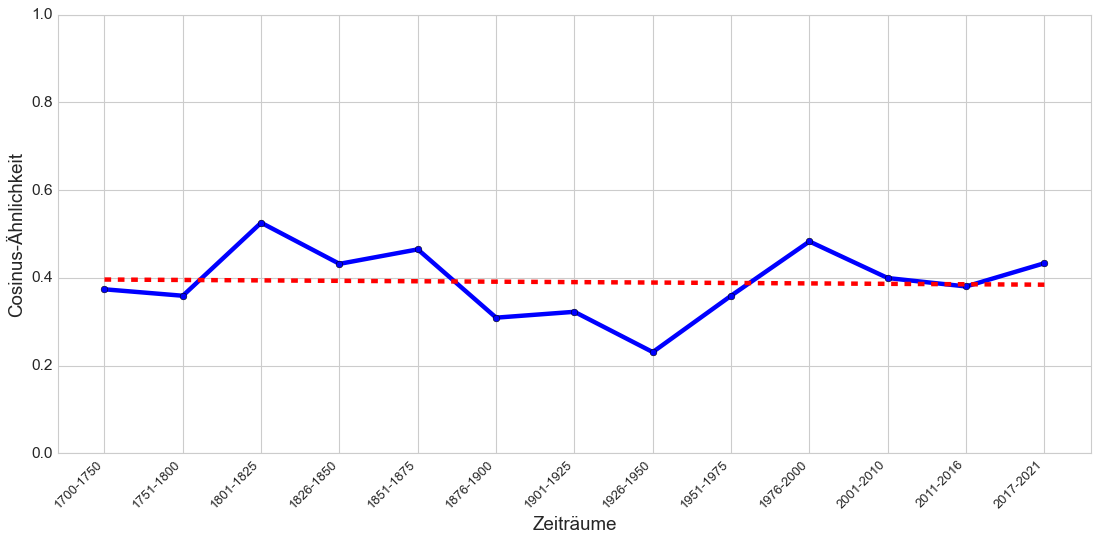

In [75]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [76]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [77]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

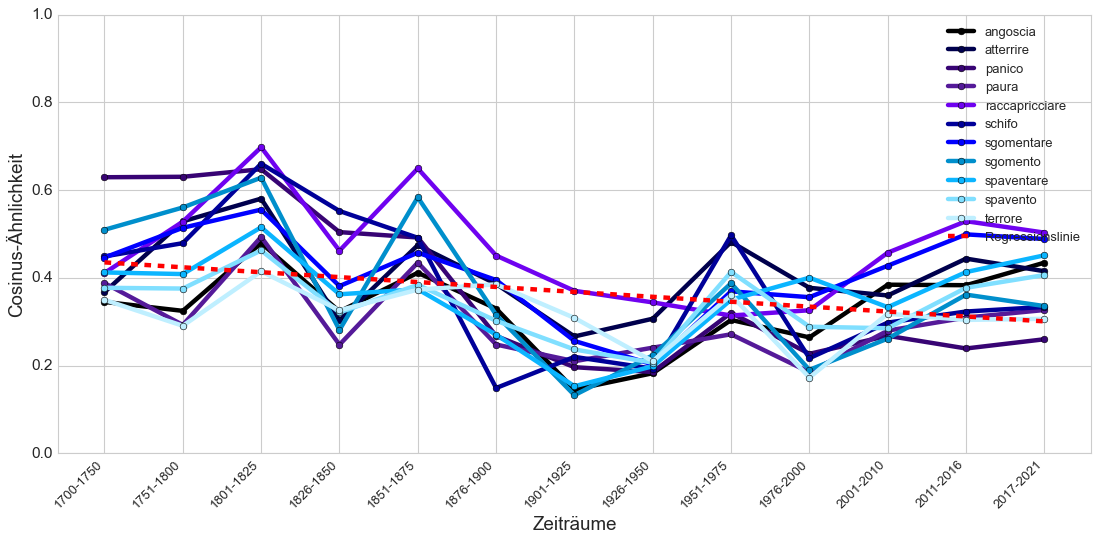

In [78]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

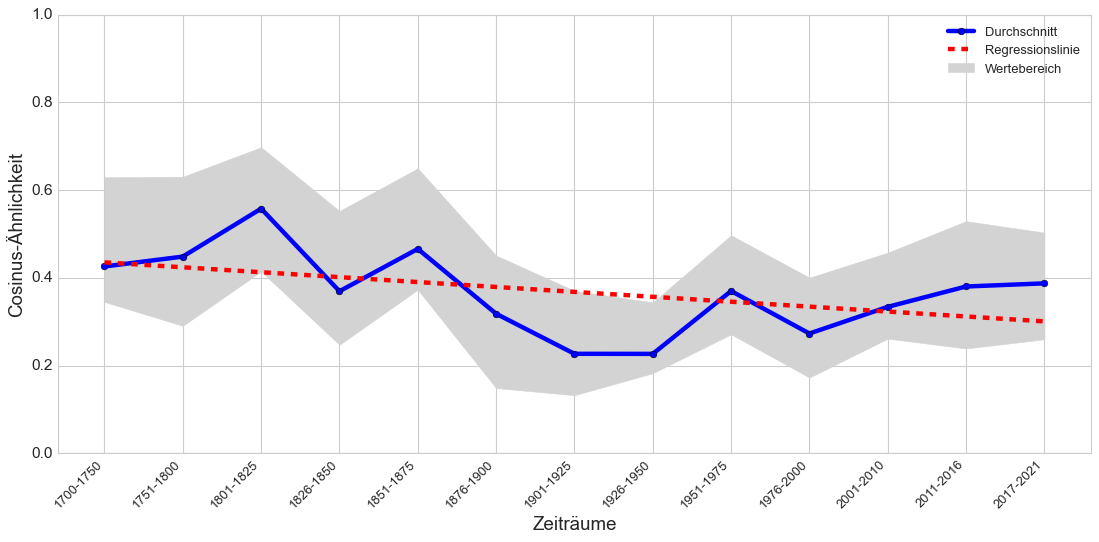

In [79]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

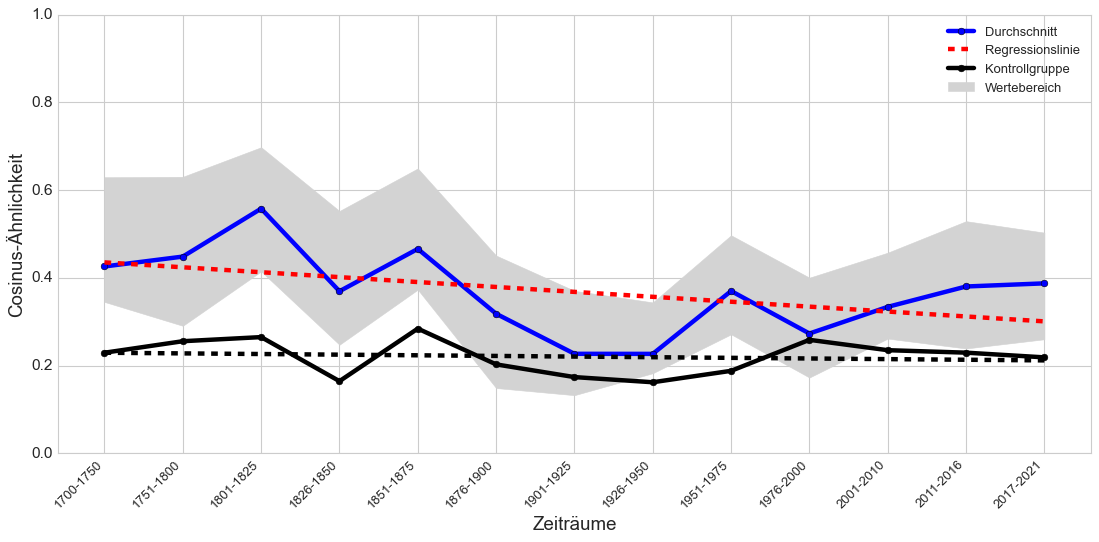

In [80]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [81]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,"(fulmini, 0.9383766055107117)","(veniregiungere, 0.9021380543708801)","(comprimere, 0.8657843470573425)","(spasmodico, 0.7645671963691711)","(gastigata, 0.7496631741523743)","(attenderla, 0.6437186002731323)","(cole, 0.7757026553153992)","(terribilmente, 0.770435094833374)","(terribilmente, 0.7384173274040222)","(terribilmente, 0.7644439935684204)","(terribilmente, 0.7532645463943481)"
1,not in vocab,not in vocab,"(avara, 0.9318459033966064)","(concludentemente, 0.8765221834182739)","(anelito, 0.8313500285148621)","(irrimediabilmente, 0.7585719227790833)","(fedelt, 0.7292230725288391)","(lohengrin, 0.6343869566917419)","(attendistici, 0.713860273361206)","(spaventosamente, 0.6451611518859863)","(spaventosamente, 0.6023058891296387)","(mostruosamente, 0.6110275983810425)","(mostruosamente, 0.6496106386184692)"
2,not in vocab,not in vocab,"(rimbombar, 0.9263460636138916)","(idealista, 0.8748469948768616)","(spasimante, 0.8301323652267456)","(vanitoso, 0.7582611441612244)","(giuridicamente, 0.7258750796318054)","(imbriani, 0.6102780103683472)","(stalinismo, 0.711579442024231)","(mostruosamente, 0.6264796257019043)","(noioso, 0.5877732634544373)","(noioso, 0.5974027514457703)","(spaventosamente, 0.62203049659729)"
3,not in vocab,not in vocab,"(innalzan, 0.9263060688972473)","(repugnanti, 0.8733874559402466)","(ghiacciato, 0.8295818567276001)","(impudenza, 0.7578340768814087)","(istruirle, 0.7230431437492371)","(ilil, 0.6019514799118042)","(inadeguato, 0.7023552656173706)","(insuperabile, 0.6035215854644775)","(mostruosamente, 0.5872107744216919)","(spaventosamente, 0.5910489559173584)","(assuefazione, 0.604948103427887)"
4,not in vocab,not in vocab,"(dolorando, 0.9258135557174683)","(seccanti, 0.8729397654533386)","(pulsazione, 0.8208330869674683)","(commoveva, 0.7564792633056641)","(creandole, 0.7213169932365417)","(majolica, 0.5950939655303955)","(nefasto, 0.698515772819519)","(egoista, 0.5998937487602234)","(irritante, 0.5807477831840515)","(banale, 0.5830492973327637)","(puzzare, 0.5966030359268188)"
5,not in vocab,not in vocab,"(orditrice, 0.9255516529083252)","(deliberò, 0.8728476166725159)","(sgorgare, 0.8151687979698181)","(tradito, 0.7561661601066589)","(conquistarle, 0.7167437672615051)","(distorti, 0.5927649140357971)","(marxistico, 0.6972715258598328)","(complicare, 0.5817230939865112)","(atrocemente, 0.5620203018188477)","(annoiare, 0.5660284161567688)","(imbarazzante, 0.5905495285987854)"
6,not in vocab,not in vocab,"(eccheggianti, 0.925437867641449)","(abbandonavasi, 0.8725330829620361)","(tormentato, 0.8098614811897278)","(corrucciata, 0.7558169960975647)","(vendico, 0.7159303426742554)","(esecrabile, 0.5863825082778931)","(disorientasse, 0.6939647793769836)","(serioso, 0.5788096189498901)","(cinico, 0.5619319081306458)","(seducente, 0.5606603026390076)","(eccessivamente, 0.5849514007568359)"
7,not in vocab,not in vocab,"(circoli, 0.9245814681053162)","(mentisse, 0.8715598583221436)","(rantolo, 0.8097785115242004)","(annientare, 0.7553408145904541)","(sacrificarti, 0.715394139289856)","(unopaura, 0.5861161351203918)","(metafisicizzazione, 0.6933056116104126)","(arcigno, 0.5761229395866394)","(chic, 0.540910542011261)","(pedante, 0.548520565032959)","(insicuro, 0.5835008025169373)"
8,not in vocab,not in vocab,"(desíose, 0.9232436418533325)","(momentanea, 0.8709631562232971)","(spasmodico, 0.8086831569671631)","(aridit, 0.7549967169761658)","(strabastare, 0.7143064737319946)","(miserabili, 0.5843470692634583)","(qualitativamente, 0.6922733783721924)","(frustrante, 0.5736064314842224)","(moralista, 0.5377168655395508)","(disturbante, 0.5435234308242798)","(angosciante, 0.5811119079589844)"
9,not in vocab,not in vocab,"(asuonar, 0.9218911528587341)","(violente, 0.8706002831459045)","(interrotte, 0.8080256581306458)","(lenire, 0.7530322670936584)","(granch, 0.712

In [82]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.35550713539123535,
 '1826-1850': 0.4931620657444,
 '1851-1875': 0.4815617501735687,
 '1876-1900': 0.4454813301563263,
 '1901-1925': 0.4095425009727478,
 '1926-1950': 0.26632875204086304,
 '1951-1975': 0.3483998775482178,
 '1976-2000': 0.5322080850601196,
 '2001-2010': 0.41331517696380615,
 '2011-2016': 0.4340040981769562,
 '2017-2021': 0.43646013736724854}

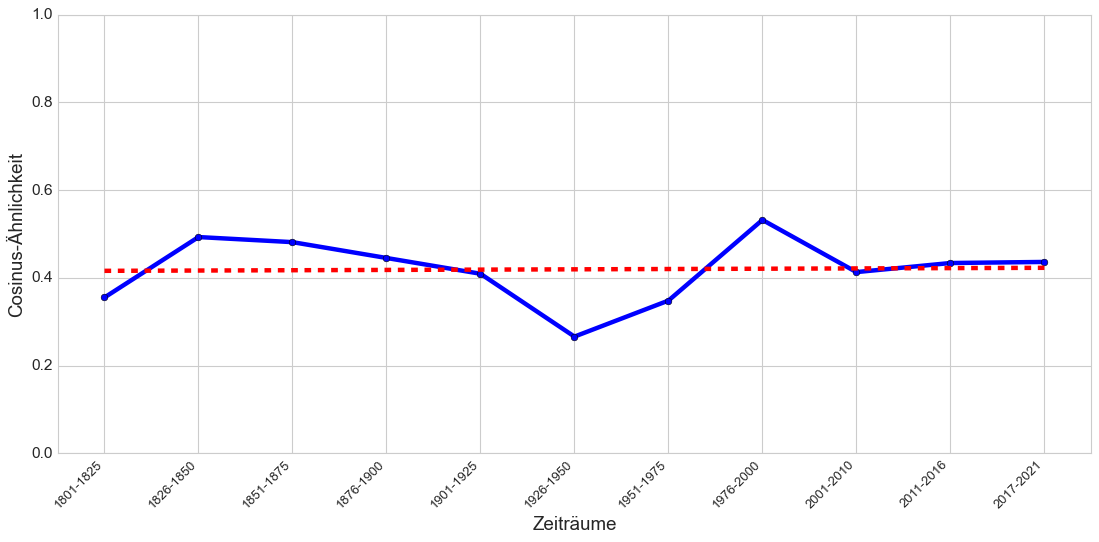

In [83]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [84]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [85]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

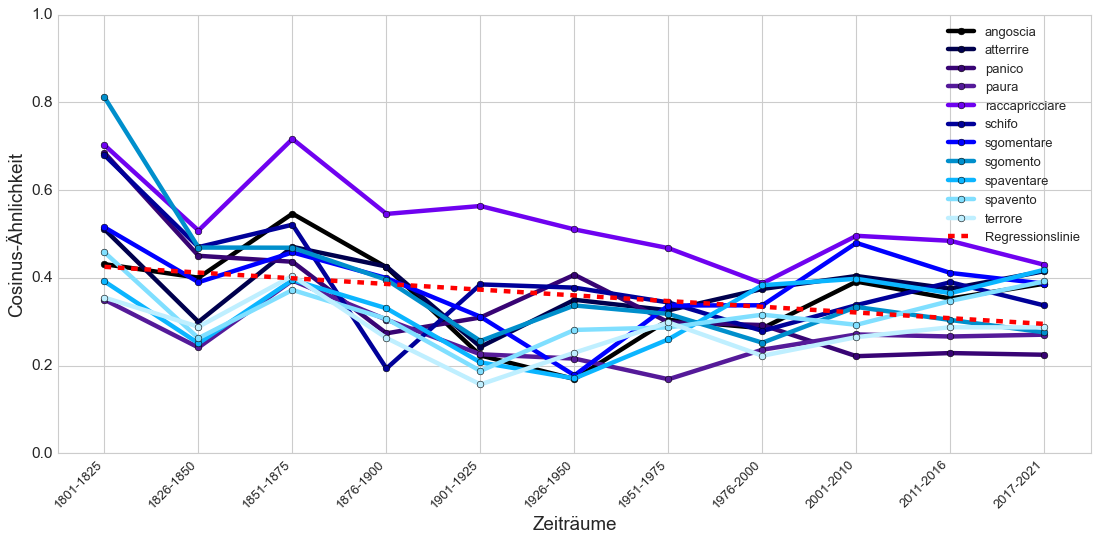

In [86]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

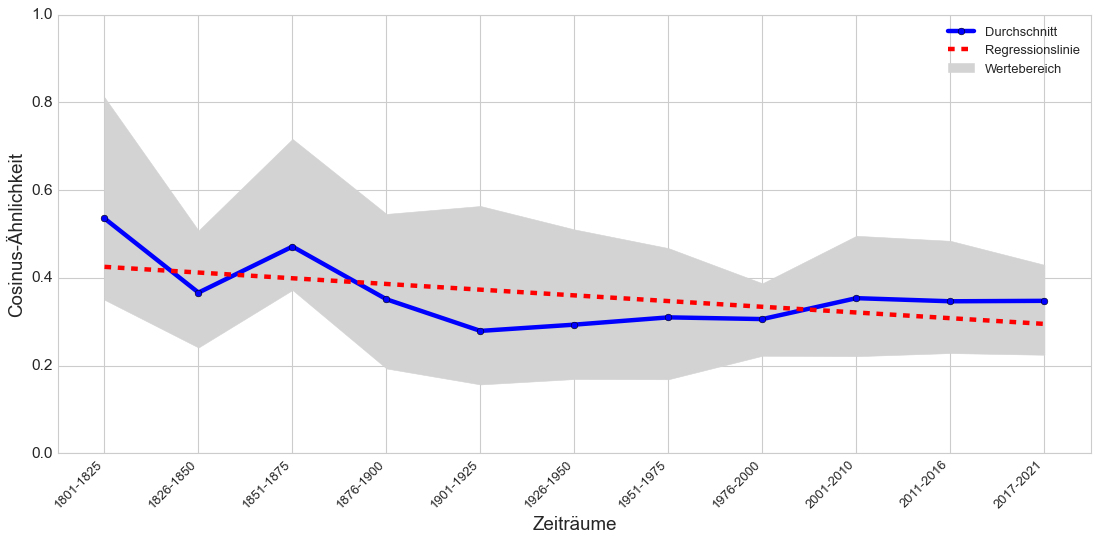

In [87]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()